# scIB score plots
Compare scIB scores across integration methods and datasets.

In [52]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import minmax_scale

import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sb

In [3]:
BIO=['graph_cLISI','NMI','ARI','ASW_cell_type']
BATCH=['PC_regression','ASW_batch','kBET','graph_connectivity','graph_iLISI']

#### Load data

In [28]:
# Mock data
data=pd.DataFrame(np.random.randint(0,10,(4,len(BIO)+len(BATCH))),columns=BIO+BATCH)
data['dataset']=['d1','d1','d2','d2']
data['method']=['m1','m2','m1','m2']

In [15]:
display(data)

,graph_cLISI,NMI,ARI,ASW_cell_type,PC_regression,ASW_batch,kBET,graph_connectivity,graph_iLISI,dataset,method
0,4,1,2,1,2,7,9,7,0,d1,m1
1,6,1,6,5,1,8,0,5,1,d1,m2
2,9,4,2,4,4,1,3,2,5,d2,m1
3,8,1,8,2,8,3,9,0,8,d2,m2


#### All scores
Plots of scores, as computed by scIB, across datasets and methods.

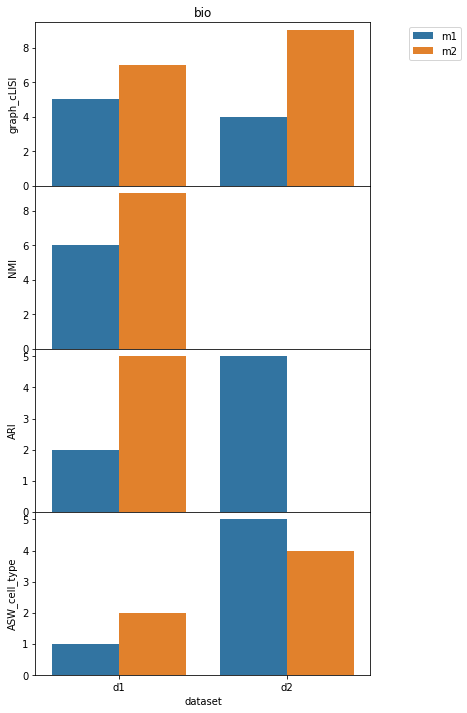

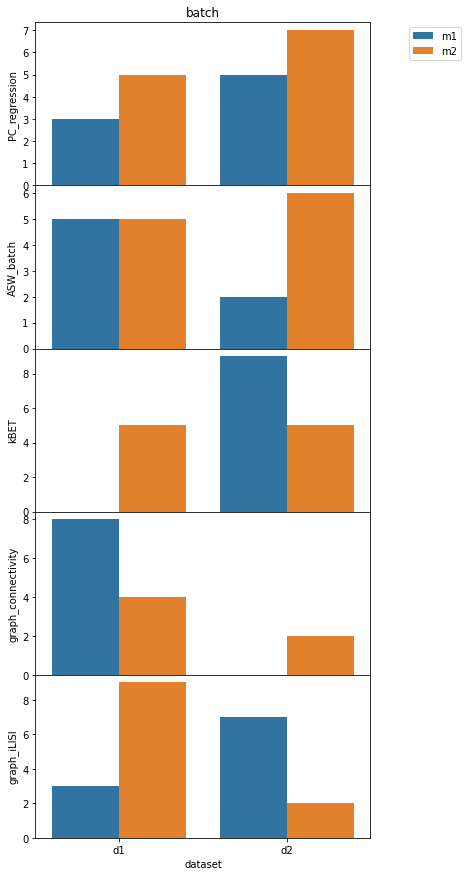

In [48]:
# Score values across datasets and methods
for name,metrics in {'bio':BIO,'batch':BATCH}.items():
    ncol=1
    nrow=len(metrics)
    fig,ax=plt.subplots(nrow,ncol,figsize=(6*ncol,3*nrow),sharex=True)
    for idx,metric in enumerate(metrics):
        sb.barplot(x='dataset',y=metric,hue='method',data=data,ax=ax[idx])
        if idx!=0:
            ax[idx].legend_.remove()
        else:
             ax[idx].legend(bbox_to_anchor=(1.1, 1))
    ax[0].set_title(name)
    plt.subplots_adjust(wspace=0, hspace=0)

#### Summarised scores
Prepare summary scores.
Scores are min-max normalised across all evaluations or within each dataset. Mean is computed for bio and batch scores and the overall scores is a weighetd average of bio and batch score.

##### Normalise across all scores

In [54]:
# Min-Max normalise scores
data_norm=data.copy()
for metric in BIO+BATCH:
    data_norm[metric]=minmax_scale(data[metric].values.reshape(-1,1))

In [61]:
# Compute summary metrics
data_norm['bio']=data_norm[BIO].mean(axis=1)
data_norm['batch']=data_norm[BATCH].mean(axis=1)
data_norm['overall']=data_norm['bio']*0.6+data_norm['batch']*0.4

In [62]:
data_norm

,graph_cLISI,NMI,ARI,ASW_cell_type,PC_regression,ASW_batch,kBET,graph_connectivity,graph_iLISI,dataset,method,bio,batch,overall
0,0.2,0.666667,0.4,0.00,0.0,0.75,0.000000,1.00,0.142857,d1,m1,0.316667,0.378571,0.341429
1,0.6,1.000000,1.0,0.25,0.5,0.75,0.555556,0.50,1.000000,d1,m2,0.712500,0.661111,0.691944
2,0.0,0.000000,1.0,1.00,0.5,0.00,1.000000,0.00,0.714286,d2,m1,0.500000,0.442857,0.477143
3,1.0,0.000000,0.0,0.75,1.0,1.00,0.555556,0.25,0.000000,d2,m2,0.437500,0.561111,0.486944


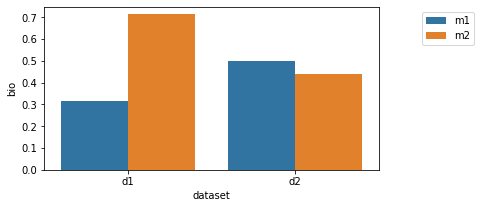

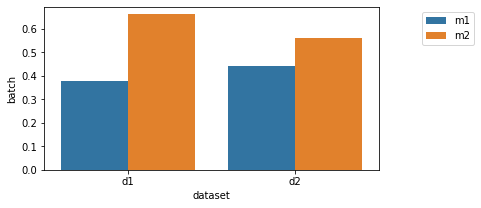

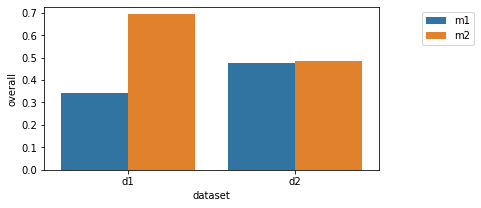

In [71]:
for summary in ['bio','batch','overall']:
    fig,ax=plt.subplots(figsize=(6,3))
    sb.barplot(x='dataset',y=summary,hue='method',data=data_norm,ax=ax)
    ax.legend(bbox_to_anchor=(1.3, 1))

##### Normalise within dataset

In [74]:
# Min-Max normalise scores within dataset
data_norm_group=data.copy()
for metric in BIO+BATCH:
    for dataset in data.dataset.unique():
        rows=data_norm_group.index[data_norm_group.dataset==dataset]
        data_norm_group.loc[rows,metric]=minmax_scale(data.loc[rows,metric].values.reshape(-1,1))

In [78]:
# Compute summary metrics
data_norm_group['bio']=data_norm_group[BIO].mean(axis=1)
data_norm_group['batch']=data_norm_group[BATCH].mean(axis=1)
data_norm_group['overall']=data_norm_group['bio']*0.6+data_norm_group['batch']*0.4

In [79]:
data_norm_group

,graph_cLISI,NMI,ARI,ASW_cell_type,PC_regression,ASW_batch,kBET,graph_connectivity,graph_iLISI,dataset,method,bio,batch,overall
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,d1,m1,0.00,0.2,0.08
1,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,d1,m2,1.00,0.6,0.84
2,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,d2,m1,0.50,0.4,0.46
3,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,d2,m2,0.25,0.6,0.39


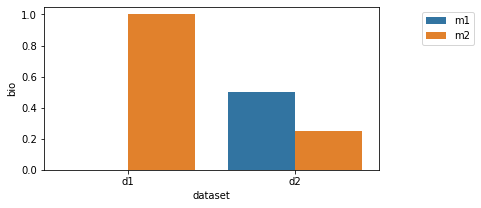

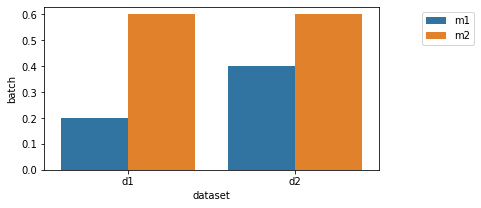

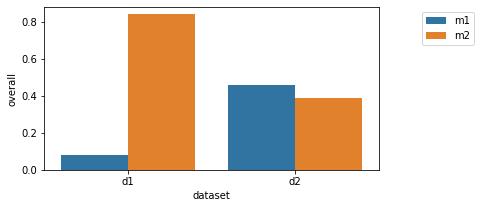

In [80]:
for summary in ['bio','batch','overall']:
    fig,ax=plt.subplots(figsize=(6,3))
    sb.barplot(x='dataset',y=summary,hue='method',data=data_norm_group,ax=ax)
    ax.legend(bbox_to_anchor=(1.3, 1))